## Examples taken  Newman (2013)

Revised and xpanded version of Newman (2012):

Newman, Mark.  2012.  *Computational Physics*.  ISBN 978-148014551-1.

Astonishingly. this book, which I am holding in my hand, lists no publisher in the front matter.
Is it self-published?  It was presumably used in his U mIchigan Physics 411 couirse (Computational Physics),
last taught Winter 2019.  Additional resources can be found [here.](http://www.umich.edu/~mejn/cp)

Hard copies are available on Amazon, where the reviews cite it as a wonderful book
for learning Python. I agree.

## Interference

#### Mark Newman's ripples.py (Sec. 3.3 p. 109)

The original Newman code

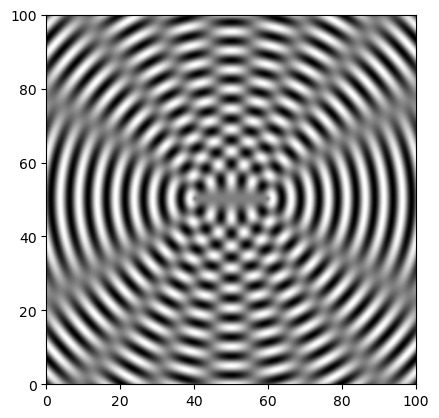

In [545]:
from math import sqrt,sin,pi
from numpy import empty
from pylab import imshow,gray,show

wavelength = 5.0
k = 2*pi/wavelength
xi0 = 1.0
separation = 20.0      # Separation of centers in cm
side = 100.0           # Side of the square in cm
points = 500           # Number of grid points along each side
spacing = side/points  # Spacing of points in cm


# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# Make an array to store the heights
xi = empty([points,points],float)

# Calculate the values in the array
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = sqrt((x-x1)**2+(y-y1)**2)
        r2 = sqrt((x-x2)**2+(y-y2)**2)
        xi[i,j] = xi0*sin(k*r1) + xi0*sin(k*r2)

# Make the plot
imshow(xi,origin="lower",extent=[0,side,0,side])
gray()
show()

#### Modified version of Newman's code

1. Uses array computations on meshgrid components to find wave heights
2. Uses pcolormesh rather than imshow
3. Adds color map realization of wave heights, along with optional color normalization.
4. Adds light source and shading option (not really a winner).
5. Added hooks for varying the wavelength,distance, and amplitude of the two sources.

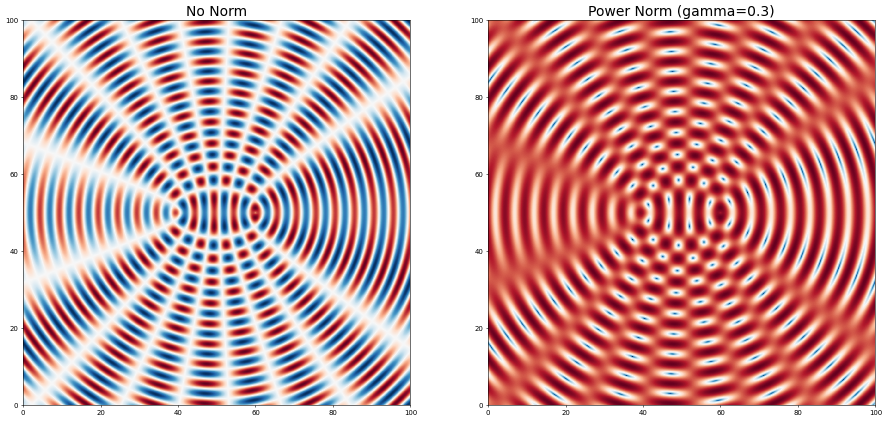

In [771]:

import numpy as np
from matplotlib import colors
import matplotlib as mpl

def combine_colorings (M1,M2):
    M = M1 + M2
    N = np.linalg.norm(M,axis=2)[:,:,np.newaxis]
    return M/N



####################################
# Wavesoruce parameters

wavelength = 5.0
#wavelength = 4.0
#wavelength = 3.0
# This is a cool moire
#wavelength = 1
# This one is really cool, oh and btw: What the hell!
#wavelength = .01
k1,k2 = 2*pi/wavelength,2*pi/wavelength
# Try two different frequencies
#k1,k2 = 2*pi/wavelength,2*pi/(wavelength-1)

# For fun tablecloth effects, make xi0 and xi1 unequal
xi0,xi1 = 1.0, 1.0

# Varying the separation (or the difference in phase) has interesting effects as well
#separation = 10.0      # Separation of centers in cm
separation = 20.0
#separation = 30.0

xside,yside = 100.0,100.0           # Sides of the rectangle in cm
xpoints,ypoints = 2000,2000           # Number of grid points along each side
#xpoints,ypoints = 500,500           # Number of grid points along each side
dx = xside/xpoints  # Spacing of xcoords in cm
dy = yside/ypoints  # Spacing of ycoords in cm

# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

#####################################################
##  The  array implementation
#####################################################
# rectangular yside x xside grid.  y has horizontal coords,
# x has verticalcoords, y horiozontal
y, x = np.mgrid[0:yside+dy:dy, 0:xside+dx:dx]


## Distance of each point from the two centers
r1 = np.sqrt((x - x1)**2 + (y - y1)**2)
r2 = np.sqrt((x - x2)**2 + (y - y2)**2)
# Compute arrays for the height components
z1 = xi0*np.sin(k1*r1) 
z2 = xi1*np.cos(k2*r2)

# Sum height components
M = z1 + z2

###################### End array computation  #############
#  Fun pattern (k1==k2)
#z1 = xi0*np.sin(k1*r1) 
#z2 = xi0*np.cos(2*k2*r2)
############################################################


###########################################################
# Picture attributes
###########################################################

#cmap=plt.cm.magma
#cmap=plt.cm.copper
cmap = plt.cm.RdBu_r
#cmap = plt.cm.RdBu
#cmap = plt.cm.hot
#cmap = plt.cm.bone
#cmap = plt.cm.coolwarm
#cmap=plt.cm.viridis
# This one is massively inappropriate, but worth a looksee
#cmap = plt.cm.hsv

shading = False
norming= True

if shading:
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=cmap, vert_exag=1.5,
                    norm=colors.PowerNorm(0.5), blend_mode='hsv')
    # combine separate colorings of the two wave sources
    #M1 = light.shade(z1, cmap=cmap, vert_exag=1.5,
    #                norm=colors.PowerNorm(0.5), blend_mode='hsv')
    #M2 = light.shade(z2, cmap=cmap2, vert_exag=1.5,
    #                norm=colors.PowerNorm(0.5), blend_mode='hsv')
    #M = combine_colorings(M1,M2)


if norming:
    # The right way to apply log norming with the colormap is to avoid a small region
    # around 0 (filled if necessary by a linear mapping).  The size of the region
    # is specified by linthresh. Perhaps the prettiest color rendering.
    norm=colors.SymLogNorm(vmin=M.min(), vmax=M.max(),linthresh=.01)
    #norm = colors.Normalize(vmin=M.min(), vmax=M.max())
    gamma=.3
    norm2 = colors.PowerNorm(gamma=gamma)
else:
    norm=None
    
###########################################################
# Plot attributes
###########################################################

# Make the plot. Attention: dpi decide the final size.
width=10
fig,(ax,ax2) = plt.subplots(1,2,figsize=(2*width +2, width), dpi=50,frameon=False)

#ax.pcolormesh(x,y,M,cmap=cmap,norm=norm)
#ax.set_title("SymLogNorm",fontsize=20)
ax.pcolormesh(x,y,M,cmap=cmap)
_ = ax.set_title("No Norm",fontsize=20)
ax2.pcolormesh(x,y,M,cmap=cmap,norm=norm2)
_ = ax2.set_title(f"Power Norm (gamma={gamma})",fontsize=20)

#### A note on the effects of color normalization

In the unnormalized plot on the left, notice the complete disappearance of the dark concentric halos 
that are clearly visible around each source
in Newman's original plot in gray.  You can make the halos return in this visualization
by using the grayscale colormap `plt.cm.bone` (in which case you need to turn off color normalization as well)
or `plt.cm.magma` or `plt.cm.copper`. Alternatively, using a PowerNorm for color normalization helps bring them back as shown on the right. With other normalizations (such as Log normalization), the halos disappear.

Note that we are using the same data in both
pictures (and even the same color map!); only the way in which color represents wave amplitude differs.
This is something about how color and shape perception interact. 

If you look carefully at the halos you see they are something of an illusion.  They're discontinuous.
They are constructed by the eye by joining dark arcs 
with other dark arcs that lie across an interference ray, but are slightly misaligned.
Nevertheless the eye assembles such slightly misaligned
arcs into a single circle.  Exactly the same arcs exist in the picture 
on the left but the eye refuses to assemble them into halos because of the way the interference rays 
and their boundaries have been  colored (bright white).

The picture on the right looks more like what most lab wave interference experiments produce,
but it's not entirely clear which picture is better or truer.

## Millikan Photoelectric Effect Experiment:   Newman exercise 3.8 (p. 123)

The whole source of excitement about the photolectric effect was that it is governed by a
very simple equation, whose verification turned out to be very strong evidence that light consists of particles
(let's call them photons).

$$
\text{V} = \frac{h}{e} \nu - \Phi
$$

Read this as V (Voltage) = $\frac{h}{e}$ (Planck's Constant divided by the charge) times
$\nu$ (the frequency of the light) minus $\Phi$ (known as the work function of the surface).
So an electron gets kicked up from the surface by a photon, loses a little energy ($\Phi$)
because it takes some work to pry it loose, and then has energy (V) proportional to the
light's wavelength.

The experimental setup was such that the work function of the surface was constant throughout
the experiment.

Here is Millikan's data, measuring the voltage produced by single photons of light
at various frequencies. He won the Nobel Prize for these results, which confirmed
predictions made in Einstein's 1905 work on the photoelectric effect, for which Einstein also
won the Nobel Prize.

In [29]:
import pandas as pd

e_charge = 1.602e-19
df = pd.read_csv("millikan.txt",header=None,delimiter= " ",names=("Frequency","Voltage"))

In [30]:
df

,Frequency,Voltage
0,5.487400e+14,0.53090
1,6.931000e+14,1.08420
2,7.430700e+14,1.27340
3,8.219300e+14,1.65980
4,9.607400e+14,2.19856
5,1.184000e+15,3.10891


1.  The equation says the Frequency and the voltage should be related by a linear relation. Assuming the data do obey this linear relation, use Scikit learn's linear regression implementation to find $\frac{h}{e}$ and $\Phi$ from these data points.  

2.  Then given that the charge of an electron  is $1.602e^{-19}$, estimate Planck's constant. This is one of the most important constants in Physics.  Look it up to see how good your estimate is.  Compute your percentage of error.

3.  Draw a scatter plot of the 6 data points.  Use the results of your linear regression to plot the  line that is the best fit to these points in the same plot.  You will need to make a fairly arbitrary decision about the aspect of the figure (ratio of height to width), since the x and y axis represent different units with very different orders of magnitude.

4.  What is the value of $\Phi$?  Hint:  It's work.  It shouldn't be negative.

## Solution

In [48]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model

Xsample = df[["Frequency"]]

Ysample = df[["Voltage"]]# income_train[["median_house_value"]]

lin1 = linear_model.LinearRegression()

lin1.fit(Xsample,Ysample)

#e_charge x h_over_e = h
h_over_e = lin1.coef_[0,0]
plancks_c_est = h_over_e * e_charge

plancks_c = 6.62607015e-34
err = (plancks_c - plancks_c_est)/plancks_c
print(f"{plancks_c_est=}      {err=:.2%}")
print(f"Phi = {-lin1.intercept_[0]:.4f}"  )

plancks_c_est=6.549340228345049e-34      err=1.16%
Phi = 1.7312


And [Wikipedia](https://en.wikipedia.org/wiki/Planck_constant) gives the value of Planck's Constant as

$$
6.62607015×10^{−34}\, \text{joule}/\text{hertz}
$$

Planck's constant had independently been computed from other work.  This level of agreement was strong evidence that the equation was right.

The plot below is the first thing Millikan was looking for.  Is there an underlying linear relation in the data?
Yes.

Text(0, 0.5, 'Voltage')

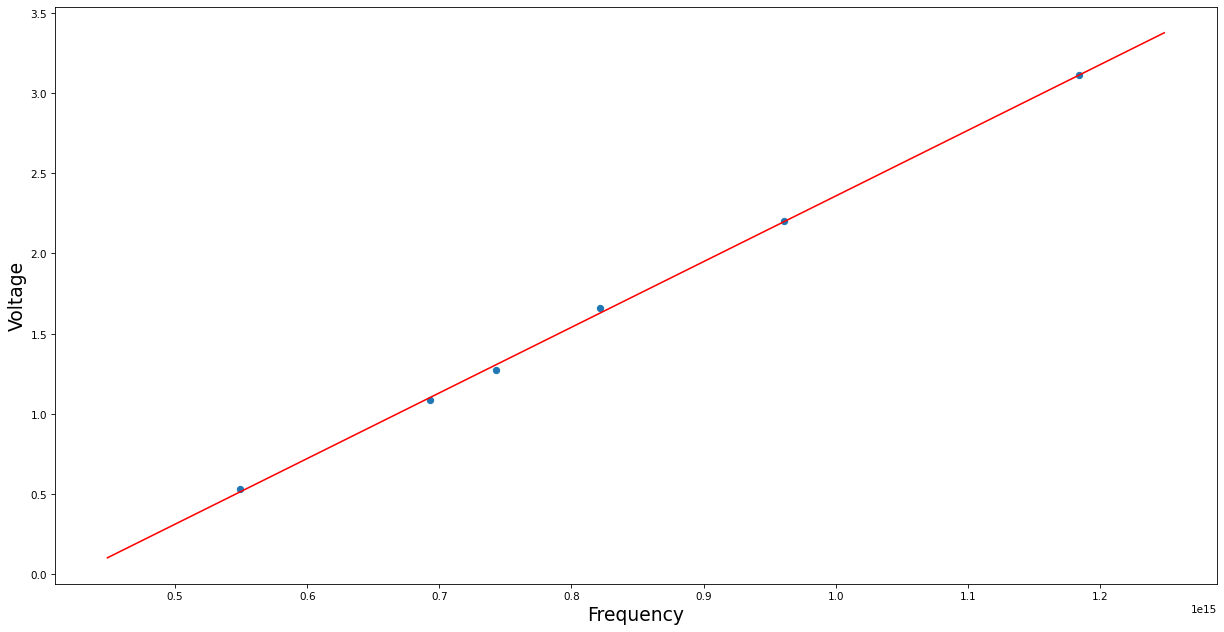

In [215]:
fig, ax = plt.subplots(1,1,figsize=(2*width, width), dpi=75,frameon=False)
ax.scatter(Xsample,Ysample)
delta = 1e14
x = np.arange(Xsample.values.min()-delta,Xsample.values.max()+delta,1e14)
b,m = lin1.intercept_[0],lin1.coef_[0,0]
ax.plot(x,(m*x)+b,c="r")
ax.set_xlabel("Frequency",fontsize=18)
ax.set_ylabel("Voltage",fontsize=18)

An energy measurement:

In [712]:
#Freq of green light 540 THz
f = 540*10**12
##  Energy of one green photon per E = hf
print(f"{plancks_c*f:.4e} Joules")

3.5781e-19 Joules


Conclusion: Don't be too worried about getting struck by a photon of green light.  It won't hurt.

### Deltoid curve

Wikipedia calls a deltoid curve: "the roulette created by a point on the circumference of a circle as it rolls without slipping along the inside of a circle with three or one-and-a-half times its radius."

Anyway here's one, plotted  as a paramteric curve following the directions of exercise 3.2, p.98.  Note how
close the equation of a cardioid is to the equation of a deltoid.

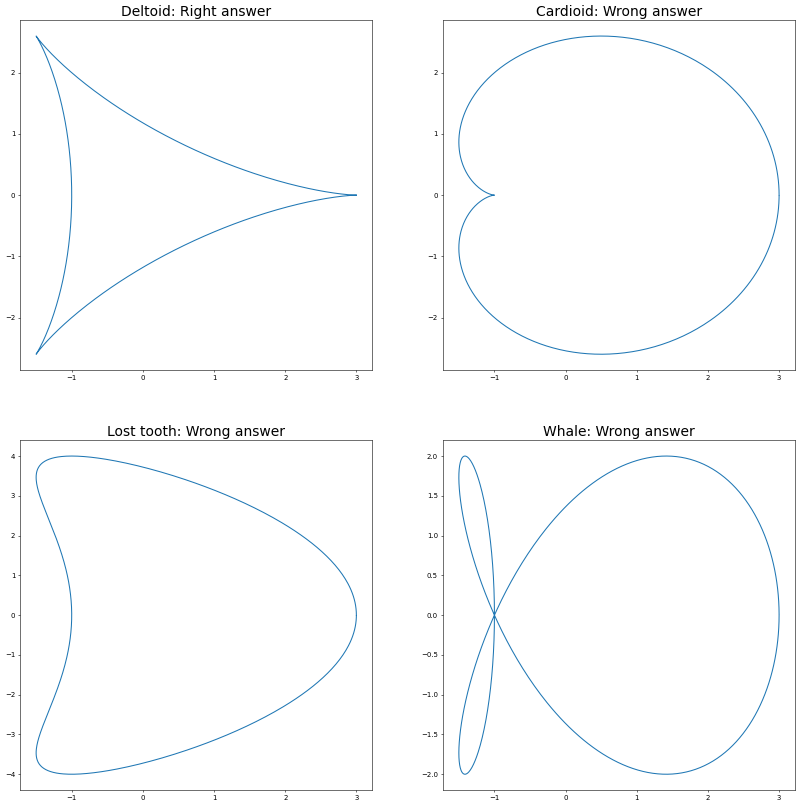

In [218]:

import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
import matplotlib as mpl

theta = np.arange(0,2*np.pi,.01)
x = 2 * np.cos(theta) + np.cos(2*theta)
y = 2 * np.sin(theta) - np.sin(2*theta)
y2 = 2 * np.sin(theta) + np.sin(2*theta)

width=10
fig, axes = plt.subplots(2,2,figsize=(2*width, 2*width), dpi=50,frameon=False)

axes[0,0].plot(x,y)
axes[0,0].set_title("Deltoid: Right answer",fontsize=20)
axes[0,1].plot(x,y2)
_ = axes[0,1].set_title("Cardioid: Wrong answer",fontsize=20)
axes[1,0].plot(x,y+y2)
_ = axes[1,0].set_title("Lost tooth: Wrong answer",fontsize=20)
axes[1,1].plot(x,y-y2)
_ = axes[1,1].set_title("Whale: Wrong answer",fontsize=20)



## Hertzsprung-Russell Diagram (a famous scatter plot)

hrdiagram.py modified, pp. 100,101.

The plot below is a famous plot in astronomy which plots temperature versus luminosity (magnitude) 
for nearly 8_000 stars. The temperature of a star is computed from its spectral lines.

Notice how the coloring is computed, and how it helps emphasize
the separation of the stars into different groups, which is
one of the points of the diagram.  There's a lot more to this diagram than can be discussed here
but its main point has been to provide fodder for theories of stellar evolution.

In [51]:
data.shape

(7860, 2)

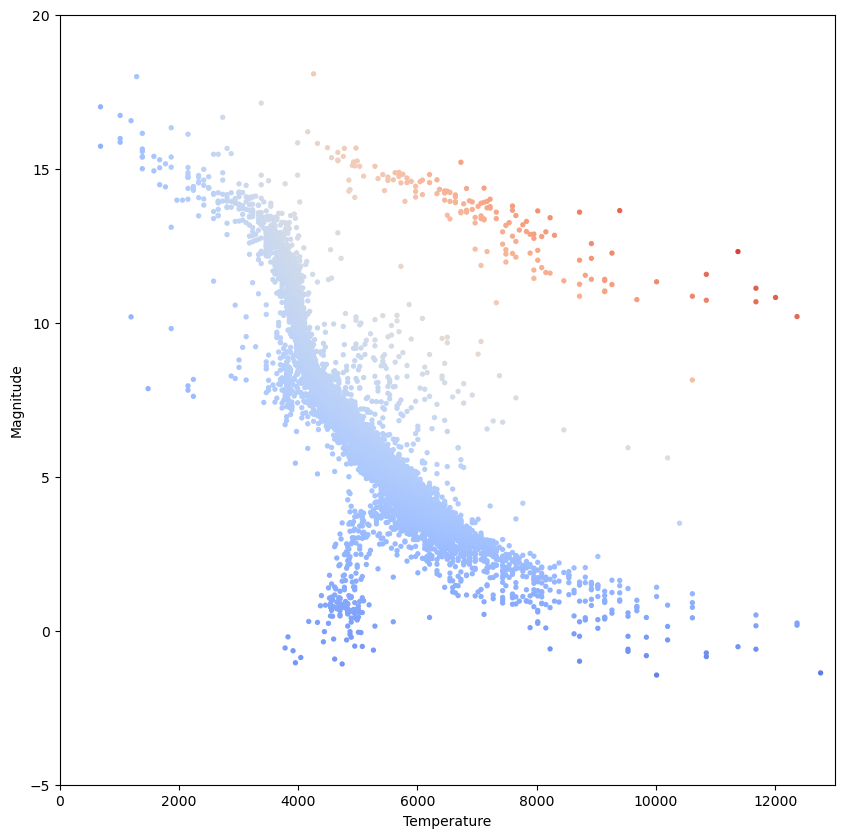

In [50]:
import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
import matplotlib as mpl

data = np.loadtxt("newman_cp/stars.txt")
x,y = data[:,0],data[:,1]
width=10
fig, ax = plt.subplots(1,1,figsize=(width, width), dpi=100,frameon=False)
ax.set_xlabel("Temperature")
ax.set_ylabel("Magnitude")
ax.set_xlim(0,13_000)
ax.set_ylim(-5,20)
cmap = plt.cm.coolwarm
ax.scatter(x,y,cmap=cmap,c=x*y,s=8)

## Density plot

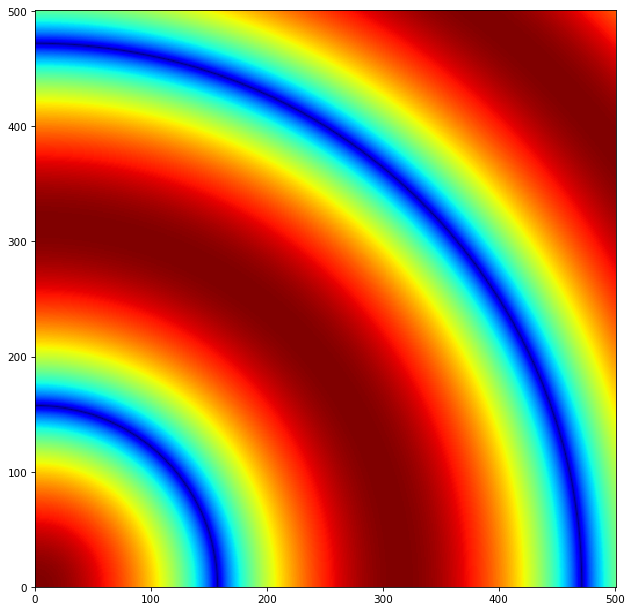

In [19]:
import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
import matplotlib as mpl

data = np.loadtxt("newman_cp/circular.txt")
width=10
fig, ax = plt.subplots(1,1,figsize=(width, width), dpi=75,frameon=False)
#cmap = plt.cm.coolwarm
cmap = plt.cm.jet
gamma=.3
norm2 = colors.PowerNorm(gamma=gamma)
#norm2=None
_ = ax.pcolormesh(data,cmap=cmap,norm=norm2)

#### An alternative (imshow)

In a lot of density plot applications both `imshow` and `pcolormesh` will work.

For many applications, pcolormesh is preferred, but `imshow` has a couple of useful features,
such as the ability to clip out a portion of the data with bounds, and rescale the aspect,
illustrated here.

Note the default for `imshow` is to place the origin in the upper left hand corner.  This
has been overriden in the pucture below with `origin=lower`.

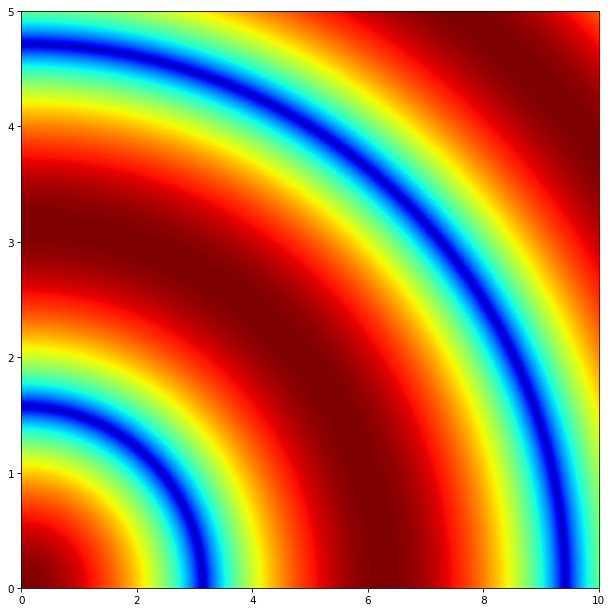

In [26]:
import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
import matplotlib as mpl

data = np.loadtxt("newman_cp/circular.txt")
width=10
fig, ax = plt.subplots(1,1,figsize=(width, width), dpi=75,frameon=False)
#cmap = plt.cm.coolwarm
cmap = plt.cm.jet
gamma=.3
norm2 = colors.PowerNorm(gamma=gamma)
_ = ax.imshow(data,cmap=cmap,norm=norm2,extent=[0,10,0,5],aspect=2,origin="lower")

## Catalan numbers

Solution to Newman's Catalan Numbers problems: 2.7 (p. 46) and  2.13 (pp. 83,84). First print Catalan vals up to a billion, using two versions, the closed form formula see [the Catalan Numbers Wikipedia page](https://en.wikipedia.org/wiki/Catalan_number) and the simple intuitive
`next_catalan` function.

In [196]:
from scipy.special import comb


def next_catalan (n, Cn):
    """
    Given n and Cn, compute C_{n+1}
    """
    return int((4*n +2)/(n + 2) * Cn)

##  Closed form expression
def catalan_closed_form (n):
    """
    Compute Cn given n using one of the closed form formulas. 
    
    Note this makes it clear that a Catalan number is always an integer.
    """
    #return int((1/(n+1))* comb(2*n,n))
    # Avoiding the need to cast as int
    return comb(2*n,n, exact=True)//(n+1)

In [197]:
c,n = 1,0
c2,n2 = 1,1

while c < 1e9:
    print(f"{n:>2} {c:> 12,}")
    print(f"{n2:>2} {c2:> 12,}")
    print()
    c = next_catalan(n,c)
    c2 = catalan_closed_form(n2)
    n  += 1
    n2 += 1

 0            1
 1            1

 1            1
 2            1

 2            2
 3            2

 3            5
 4            5

 4           14
 5           14

 5           42
 6           42

 6          132
 7          132

 7          429
 8          429

 8        1,430
 9        1,430

 9        4,862
10        4,862

10       16,796
11       16,796

11       58,786
12       58,786

12      208,012
13      208,012

13      742,900
14      742,900

14    2,674,440
15    2,674,440

15    9,694,845
16    9,694,845

16   35,357,670
17   35,357,670

17  129,644,790
18  129,644,790

18  477,638,700
19  477,638,700



Next, iterative and recursive functions for computing Catalan numbers, given $n$.

In [198]:
def iterative_catalan (n):
    c = 1
    for i in range(n):
        c = ((4*i + 2)/(i + 2)) * c
    return int(c)

def recursive_catalan (n):
    if n == 0:
        return 1
    # Equivalent: harder to understand.
    #m=n-1
    #return int((4*m +2)/(m + 2) * recursive_catalan(m))
    return int((4*n - 2)/(n + 1) * recursive_catalan(n-1))


In [188]:
for i in range(10):
    print(i, recursive_catalan (i))
    print(i, iterative_catalan(i))
    print()
        

0 1
0 1

1 1
1 1

2 2
2 2

3 5
3 5

4 14
4 14

5 42
5 42

6 132
6 132

7 429
7 429

8 1430
8 1430

9 4862
9 4862

